<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.384510,45.960799,4358.661154,4500.006463,440.104504,4059.901959
1,0.0,1.0,73.787049,20.124942,550.177451,654.089442,-468.898750,1122.988192
2,0.0,2.0,73.954115,47.696361,-140.277956,-8.627480,329.382353,-338.009833
3,0.0,3.0,82.310579,53.355289,1907.844701,2053.510569,610.318451,1443.192118
4,0.0,4.0,34.985576,71.747955,-1808.634654,-1691.901123,475.419983,-2167.321106
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.894053,30.260496,2242.211505,2376.366054,244.567586,2131.798468
249996,999.0,246.0,23.476801,28.830119,468.423227,530.730147,-195.697650,726.427797
249997,999.0,247.0,35.659016,93.600236,18677.313426,18816.572678,-39.423918,18855.996597
249998,999.0,248.0,25.096037,32.004309,522.571472,589.671818,-181.673749,771.345567


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.384510,45.960799,4358.661154,4500.006463,440.104504,4059.901959
1,0.0,1.0,73.787049,20.124942,550.177451,654.089442,-468.898750,1122.988192
2,0.0,2.0,73.954115,47.696361,-140.277956,-8.627480,329.382353,-338.009833
3,0.0,3.0,82.310579,53.355289,1907.844701,2053.510569,610.318451,1443.192118
4,0.0,4.0,34.985576,71.747955,-1808.634654,-1691.901123,475.419983,-2167.321106
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.894053,30.260496,2242.211505,2376.366054,244.567586,2131.798468
249996,999.0,246.0,23.476801,28.830119,468.423227,530.730147,-195.697650,726.427797
249997,999.0,247.0,35.659016,93.600236,18677.313426,18816.572678,-39.423918,18855.996597
249998,999.0,248.0,25.096037,32.004309,522.571472,589.671818,-181.673749,771.345567


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y       y_hat  \
rep   index                                                                 
0.0   0.0    85.384510  45.960799   4358.661154   4500.006463  440.104504   
      1.0    73.787049  20.124942    550.177451    654.089442 -468.898750   
      2.0    73.954115  47.696361   -140.277956     -8.627480  329.382353   
      3.0    82.310579  53.355289   1907.844701   2053.510569  610.318451   
      4.0    34.985576  71.747955  -1808.634654  -1691.901123  475.419983   
...                ...        ...           ...           ...         ...   
999.0 245.0  93.894053  30.260496   2242.211505   2376.366054  244.567586   
      246.0  23.476801  28.830119    468.423227    530.730147 -195.697650   
      247.0  35.659016  93.600236  18677.313426  18816.572678  -39.423918   
      248.0  25.096037  32.004309    522.571472    589.671818 -181.673749   
      249.0  80.986000  48.360920   2784.896894   2924.243814  186.661386   

                    e_hat  
rep   index                
0.0   0.0     4059.901959  
      1.0     1122.988192  
      2.0     -338.009833  
      3.0     1443.192118  
      4.0    -2167.321106  
...                   ...  
999.0 245.0   2131.798468  
      246.0    726.427797  
      247.0  18855.996597  
      248.0    771.345567  
      249.0   2737.582428  

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y       y_hat  \
rep   index                                                                 
0.0   0.0    85.384510  45.960799   4358.661154   4500.006463  440.104504   
      1.0    73.787049  20.124942    550.177451    654.089442 -468.898750   
      2.0    73.954115  47.696361   -140.277956     -8.627480  329.382353   
      3.0    82.310579  53.355289   1907.844701   2053.510569  610.318451   
      4.0    34.985576  71.747955  -1808.634654  -1691.901123  475.419983   
...                ...        ...           ...           ...         ...   
999.0 245.0  93.894053  30.260496   2242.211505   2376.366054  244.567586   
      246.0  23.476801  28.830119    468.423227    530.730147 -195.697650   
      247.0  35.659016  93.600236  18677.313426  18816.572678  -39.423918   
      248.0  25.096037  32.004309    522.571472    589.671818 -181.673749   
      249.0  80.986000  48.360920   2784.896894   2924.243814  186.661386   

                    e_hat  
rep   index                
0.0   0.0     4059.901959  
      1.0     1122.988192  
      2.0     -338.009833  
      3.0     1443.192118  
      4.0    -2167.321106  
...                   ...  
999.0 245.0   2131.798468  
      246.0    726.427797  
      247.0  18855.996597  
      248.0    771.345567  
      249.0   2737.582428  

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.384510,45.960799,4358.661154,4500.006463,440.104504,4059.901959
1,0.0,1.0,73.787049,20.124942,550.177451,654.089442,-468.898750,1122.988192
2,0.0,2.0,73.954115,47.696361,-140.277956,-8.627480,329.382353,-338.009833
3,0.0,3.0,82.310579,53.355289,1907.844701,2053.510569,610.318451,1443.192118
4,0.0,4.0,34.985576,71.747955,-1808.634654,-1691.901123,475.419983,-2167.321106
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.894053,30.260496,2242.211505,2376.366054,244.567586,2131.798468
249996,999.0,246.0,23.476801,28.830119,468.423227,530.730147,-195.697650,726.427797
249997,999.0,247.0,35.659016,93.600236,18677.313426,18816.572678,-39.423918,18855.996597
249998,999.0,248.0,25.096037,32.004309,522.571472,589.671818,-181.673749,771.345567


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2             e             Y       y_hat  \
rep   index                                                                 
0.0   0.0    85.384510  45.960799   4358.661154   4500.006463  440.104504   
      1.0    73.787049  20.124942    550.177451    654.089442 -468.898750   
      2.0    73.954115  47.696361   -140.277956     -8.627480  329.382353   
      3.0    82.310579  53.355289   1907.844701   2053.510569  610.318451   
      4.0    34.985576  71.747955  -1808.634654  -1691.901123  475.419983   
...                ...        ...           ...           ...         ...   
999.0 245.0  93.894053  30.260496   2242.211505   2376.366054  244.567586   
      246.0  23.476801  28.830119    468.423227    530.730147 -195.697650   
      247.0  35.659016  93.600236  18677.313426  18816.572678  -39.423918   
      248.0  25.096037  32.004309    522.571472    589.671818 -181.673749   
      249.0  80.986000  48.360920   2784.896894   2924.243814  186.661386   

                    e_hat  
rep   index                
0.0   0.0     4059.901959  
      1.0     1122.988192  
      2.0     -338.009833  
      3.0     1443.192118  
      4.0    -2167.321106  
...                   ...  
999.0 245.0   2131.798468  
      246.0    726.427797  
      247.0  18855.996597  
      248.0    771.345567  
      249.0   2737.582428  

[250000 rows x 6 columns]

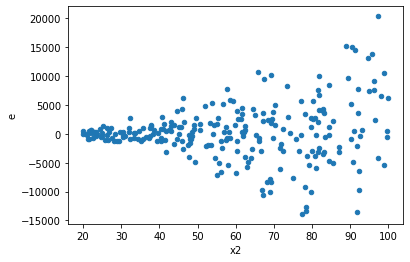

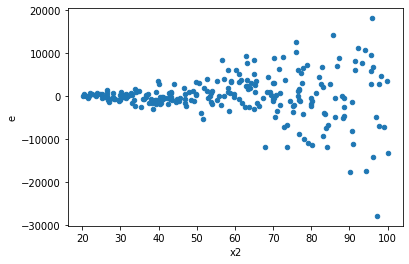

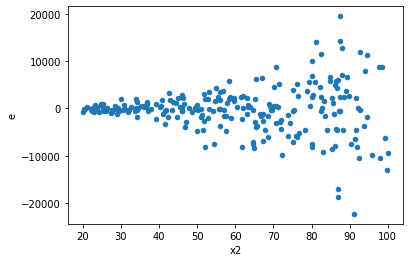

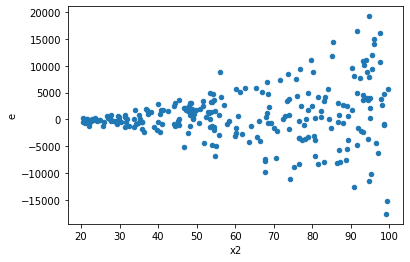

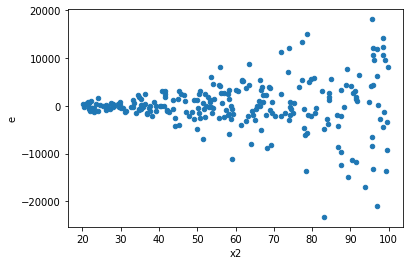

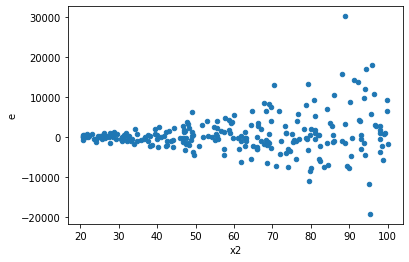

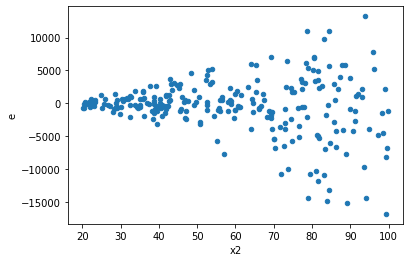

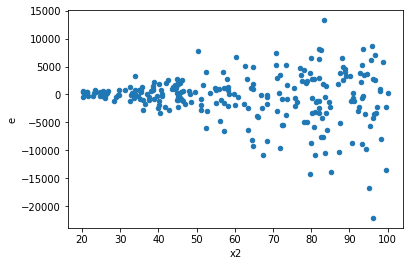

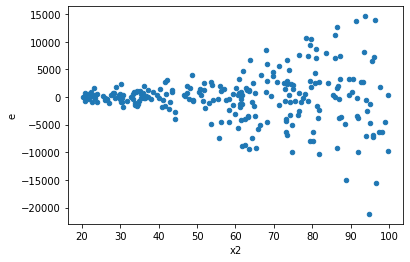

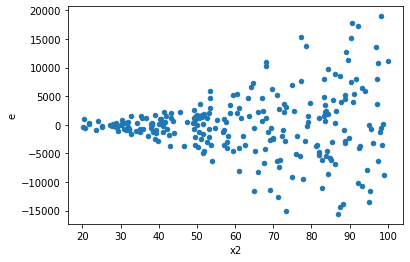

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,247915590.4207979,4294189467.1806498,2529750.9226612034,43818259.869190305,17.32117556581228,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,116640844.28398478,5170007841.932024,1190212.696775355,52755182.060530856,44.32416340664198,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,248574915.45852047,5114461149.304494,2536478.729168576,52188379.07453565,20.575129794856316,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,206170791.90865898,5113394794.850716,2103783.5909046833,52177497.906639956,24.801742029084956,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,271574004.7861131,5837213098.551811,2771163.314144011,59563398.9648144,21.49400530124044,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,236976276.36359748,4877790261.968964,2418125.269016301,49773370.02009147,20.583453908630382,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,176731931.98409823,3853698069.724898,1803387.0610622268,39323449.691070385,21.805329837460505,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,224864340.08133098,3520520384.974314,2294534.082462561,35923677.39769708,15.656196903879826,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,233626379.71107095,4098257070.6507053,2383942.650112969,41818949.7005174,17.541927738293413,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,247915590.4207979,4294189467.1806498,2529750.9226612034,43818259.869190305,17.32117556581228,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,116640844.28398478,5170007841.932024,1190212.696775355,52755182.060530856,44.32416340664198,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,248574915.45852047,5114461149.304494,2536478.729168576,52188379.07453565,20.575129794856316,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,206170791.90865898,5113394794.850716,2103783.5909046833,52177497.906639956,24.801742029084956,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,271574004.7861131,5837213098.551811,2771163.314144011,59563398.9648144,21.49400530124044,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,236976276.36359748,4877790261.968964,2418125.269016301,49773370.02009147,20.583453908630382,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,176731931.98409823,3853698069.724898,1803387.0610622268,39323449.691070385,21.805329837460505,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,224864340.08133098,3520520384.974314,2294534.082462561,35923677.39769708,15.656196903879826,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,233626379.71107095,4098257070.6507053,2383942.650112969,41818949.7005174,17.541927738293413,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64